# Homework 4

In [28]:
print('By Ofek Marom  11/19/2021 Ver1')

By Ofek Marom


In this assignment, we are working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply Agglomerative Clustering, K-means Clustering, and PCA to this dataset. <br >

## Background and Data Information
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset. 

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

### Libraries that can be used: numpy, scipy, pandas, scikit-learn, matplotlib, seaborn
Any libraries used in the discussion materials are also allowed.

# Exercises
## Exercise 1 - Agglomerative Clustering (40 points in total)

Using agglomerative clustering with a distance threshold for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to perform agglomerative clustering, we have to consider what parameters may be used: <br >

### Exercise 1.1 - Choosing Parameters (20 points)

 - Explain why you would pick these parameters. 
     - Which linkage rule should be used? (single-linkage, complete-linkage, or average-linkage)
     - Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)
     - What should the threshold distance be? 
 
Hints:
 - How the distance threshold works: Whenever two clusters are picked to consider merging them, the distance between those clusters is compared to the distance threshold. If the distance is smaller than the threshold, the clusters merge and the algorithm continues; Otherwise, they will not be merged.
 - How to choose a linkage rule: Think about how you would figure out which equivalence class the string $0001$ belongs to in the previously given example.

In [ ]:
#Which linkage rule should be used? (single-linkage, complete-linkage, or average-linkage)
# Average-linkage
#In genetics, average-linkage (or absolute) linkage[1] is defined as the state in which two loci are so close together that alleles of these loci are virtually never separated by crossing over. The closer the physical location of two genes on the DNA, the less likely they are to be separated by a crossing-over event. In the case of male Drosophila there is complete absence of recombinant types due to absence of crossing over. This means that all of the genes that start out on a single chromosome, will end up on that same chromosome in their original configuration. In the absence of recombination, only parental phenotypes are expected.[2]
#------------------
#Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)
#The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are 
#different (our case)
#------------------
#What should the threshold distance be?
# 0.45 => this will give us 4 clusters 

#------------------

In [42]:
import pandas as pd
#from bitstring import BitArray
df = pd.read_csv('./bitstrings.csv')
df = df.astype(int) 
display(df.head())


,b15,b14,b13,b12,b11,b10,b9,b8,b7,b6,b5,b4,b3,b2,b1,b0
0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0
1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
4,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0


,b15,b14,b13,b12,b11,b10,b9,b8,b7,b6,b5,b4,b3,b2,b1,b0,Value_X,Value_Y
0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0,124,768
1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,60,768
2,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,60,256
3,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,60,768
4,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0,60,1792


array([[124, 768],
       [ 60, 768],
       [ 60, 256],
       [ 60, 768]])

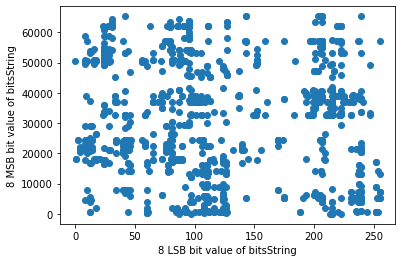

In [44]:
import matplotlib.pyplot as plt
Data = df.copy()
#--- create X and Y for plot ---
Data = Data.assign(Value_X =lambda x: ( x['b0'].astype(int) * pow(2,0)  + x['b1'].astype(int)  *pow(2,1)  + x['b2'].astype(int)  * pow(2,2)  + x['b3'].astype(int) * pow(2,3) + x['b4'].astype(int)*pow(2,4)+
                                      x['b5'].astype(int)  * pow(2,5) + x['b6'].astype(int)  * pow(2,6)  + x['b7'].astype(int) * pow(2,7) ))

Data = Data.assign(Value_Y =lambda x: (x['b8'].astype(int) * pow(2,8)  + 
                                      x['b9'].astype(int) * pow(2,9) +  x['b10'].astype(int) * pow(2,10) + x['b11'].astype(int)* pow(2,11) + x['b12'].astype(int)* pow(2,12)+
                                      x['b13'].astype(int)* pow(2,13) + x['b14'].astype(int) * pow(2,14) + x['b15'].astype(int)* pow(2,15) ))

display(Data.head())
x = Data['Value_X']
y = Data['Value_Y']
New_X = Data.iloc[:, [16, 17]].values
display(New_X[:4])
# Scatter plot
plt.xlabel('8 LSB bit value of bitsString')
plt.ylabel('8 MSB bit value of bitsString')
plt.scatter(x,y)

### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (20 points)

 - Perform the agglomerative clustering with the parameters you picked in the above three questions.
 - Show the frequency(number of members) of each cluster. You are encouraged to create a bar chart to show the distribution as it will help you in Exercise 2, but printing only the numbers is also fine.

Hints: 
 - The value of ```distance_threshold``` in the arguments should be **slightly** higher than what you picked. This is because we only merge two clusters when their distance is **strictly smaller** than the threshold.

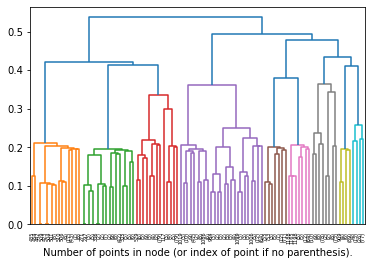

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

Show the frequency(number of members) of each cluster


0    410
1    401
2    200
3    189
Name: cluster, dtype: int64

,cluster_size,index
0,410,1
1,401,2
2,200,3
3,189,4


<AxesSubplot:title={'center':'Dendrograms -  Hamming  distance'}, xlabel='Cluster index', ylabel='Cluster size'>

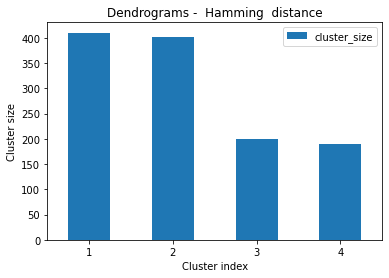

In [45]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



from sklearn.cluster import AgglomerativeClustering 
#cluster = AgglomerativeClustering(n_clusters=4, affinity='Cosine', linkage='complete')

cluster = AgglomerativeClustering(n_clusters=None,distance_threshold = 0.45, affinity='Hamming', linkage='average')
#Hamming

Y_cluster = cluster.fit_predict(df)

# plot the top three levels of the dendrogram
plot_dendrogram(cluster, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


labels = cluster.labels_
display(Y_cluster)

column_names = ['a']
output = pd.DataFrame(columns = column_names)
output.pop('a')
#display(output)
output = output.assign(cluster=Y_cluster)
#display(output)
print('Show the frequency(number of members) of each cluster')
a=output['cluster'].value_counts(ascending=False)
display(a)

column_names = ['a']
output1 = pd.DataFrame(columns = column_names)
output1.pop('a')
output1 = output1.assign(cluster_size = a)
output1['index'] = range(1, len(output1) + 1)
display(output1)

output1.plot.bar(x='index', y='cluster_size',rot = 0,title='Dendrograms -  Hamming  distance',
            xlabel="Cluster index",
            ylabel="Cluster size")


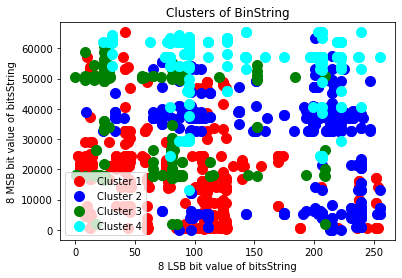

In [46]:

plt.scatter(New_X[Y_cluster == 0, 0], New_X[Y_cluster == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(New_X[Y_cluster == 1, 0], New_X[Y_cluster == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(New_X[Y_cluster == 2, 0], New_X[Y_cluster == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(New_X[Y_cluster == 3, 0], New_X[Y_cluster == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of BinString')
plt.xlabel('8 LSB bit value of bitsString')
plt.ylabel('8 MSB bit value of bitsString')
plt.legend()
plt.show()

## Exercise 2 - K-Means Clustering (30 points in total)

Let's see how k-means behave differently from agglomerative clustering.

### Exercise 2.1 - K-Means Clustering for Equivalence Classes (20 points)
 - Re-cluster the dataset with k-means, but with the number of clusters you obtained from Exercise 1.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.

Show the frequency(number of members) of each cluster


2    407
1    393
0    201
3    199
Name: cluster, dtype: int64

,cluster_size,index
2,407,1
1,393,2
0,201,3
3,199,4


<AxesSubplot:title={'center':'K-Means Clustering'}, xlabel='Cluster index', ylabel='Cluster size'>

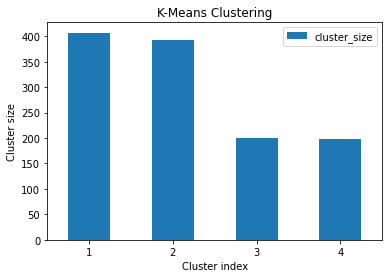

In [47]:

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

  
kmeans = KMeans(n_clusters=4).fit(df)

column_names = ['a']
output = pd.DataFrame(columns = column_names)
output.pop('a')
output = output.assign(cluster=kmeans.labels_)
print('Show the frequency(number of members) of each cluster')
a=output['cluster'].value_counts(ascending=False)
display(a)

column_names = ['a']
output1 = pd.DataFrame(columns = column_names)
output1.pop('a')
output1 = output1.assign(cluster_size = a)
output1['index'] = range(1, len(output1) + 1)
display(output1)
output1.plot.bar(x='index', y='cluster_size',rot = 0,title='K-Means Clustering',
            xlabel="Cluster index",
            ylabel="Cluster size")

### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering (10 points)

Compare the result from Exercise 2.1 with that from Exercise 1.2, and explain
 - How the two results are different
 - Why there is such a difference

In [ ]:
# How the two results are different: We can see the different by watching the bars!
# Why there is such a difference: K-Means Clustering search for the gravity around the centroids based on  Euclidean distance, while Agglomerative Clustering
#                                 build the cluster bottom up based on Hamming distance between objects.

## Exercise 3 - Principal Component Analysis (30 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 3.1 - Generate 2 Clusters (10 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

Show the frequency(number of members) of each cluster


0    768
1    432
Name: cluster, dtype: int64

,cluster_size,index
0,768,1
1,432,2


<AxesSubplot:title={'center':'K-Means Clustering'}, xlabel='Cluster index', ylabel='Cluster size'>

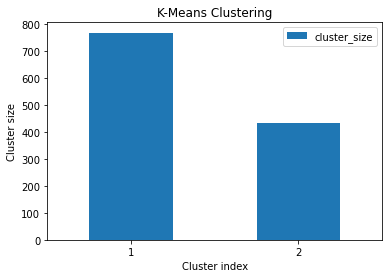

In [55]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
#display(scaler.transform(df))
kmeans = KMeans(n_clusters=2).fit(scaler.transform(df))
column_names = ['a']
output = pd.DataFrame(columns = column_names)
output.pop('a')
output = output.assign(cluster=kmeans.labels_)
print('Show the frequency(number of members) of each cluster')
a=output['cluster'].value_counts(ascending=False)
display(a)

column_names = ['a']
output1 = pd.DataFrame(columns = column_names)
output1.pop('a')
output1 = output1.assign(cluster_size = a)
output1['index'] = range(1, len(output1) + 1)
display(output1)
output1.plot.bar(x='index', y='cluster_size',rot = 0,title='K-Means Clustering',
            xlabel="Cluster index",
            ylabel="Cluster size")

### Exercise 3.2 - PCA for Feature Extraction (20 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the **highest positive** weight in the first principal component.

In [210]:
from sklearn.decomposition import PCA
df1 = df.copy()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


display(principalDf)

,principal component 1,principal component 2
0,-0.645429,0.339771
1,-0.898279,0.457490
2,-0.485742,0.487561
3,-0.898279,0.457490
4,-1.149278,0.334337
...,...,...
1195,-0.216742,-0.542621
1196,-0.605117,-0.590263
1197,0.036109,-0.660339
1198,-0.127348,-0.533229


In [ ]:
#Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.

<BarContainer object of 16 artists>

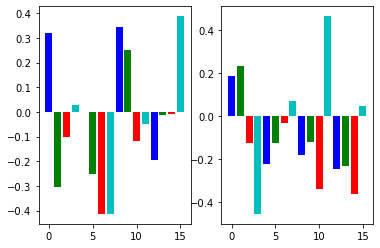

In [215]:
feature_weights = pca.components_
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.bar(range(16),feature_weights[0],color=['b','g','r','c'])
ax2.bar(range(16),feature_weights[1],color=['b','g','r','c'])

In [ ]:
The feature that has the highest positive weight in the first principal component is b15